# Проект: Исследование стартапов
- Автор: Бушмина Ольга
- Дата: 04.02.2025

<h3>Введение</h3>

Финансовая компания хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. 
Целью проекта является исследование исторических данных:
* подготовить датасет и проверить данные на адекватность
* определить какие данные могут быть полезны
* учесть возможные искажения данных
* ответить на конкретные вопросы заказчика
* найти признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


###  Вывод общей информации, исправление названия столбцов


#### Загружаем все данные по проекту

Импортируем все нужные для проекта библиотеки:

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные в переменные
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

##### Рассмотрим данные датафрейма `df_acquisition` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
# Выводим информацию о датафрейме
df_acquisition.info()
# Выводим первые строки датафрейма на экран
df_acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Итоги первичного изучения датафрейма `df_acquisition`:
* датасет содержит 6 столбцов, 9407 строк
* наименования столбцов соответствуют snake case
* столбцы `term_code` и `acquired_at` содержат пропуски
* значения в столбцах соответствуют описанию
* столбец `acquired_at` хранит дату сделки, оптимальнее заменить тип данных с object на datetime64

##### Аналогично изучим датафрейм `df_company_and_rounds`:

In [4]:
# Выводим информацию о датафрейме
df_company_and_rounds.info()
# Выводим первые строки датафрейма на экран
df_company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Итоги первичного изучения датафрейма `df_company_and_rounds`:
* датасет содержит 22 столбца, 217.774 строк
* наименования столбцов не соответствуют snake case, требуется переименование
* абсолютно все столбцы содержат пропуски, но в разном количестве
* значения в столбцах соответствуют описанию
* столбцы `company  ID`, `investment  rounds`, `funding  rounds`, `company  id`, `participants`,`is  first  round`,`is  last  round` согласно описанию данных содержат целочисленные значения, оптимально заменить тип на Int
* столбцы `funding  total`, `milestones`, `funding  round  id`, `raised  amount`, `pre  money  valuation` по описанию не совсем понятно хранят ли только целочиcленные данные, надо проверить содержимое
* `founded  at`, `closed  at`, `funded  at` хранят даты, оптимальнее заменить тип данных с object на datetime64
* столбцы `company  ID` и `company  id` судя по всему дублируют друг друга, надо проверить


##### Датафрейм `df_degrees`:

In [5]:
# Выводим информацию о датафрейме
df_degrees.info()
# Выводим первые строки датафрейма на экран
df_degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Итоги первичного изучения датафрейма `df_degrees`:
* датасет содержит 4 столбца, 109.610 строк
* наименования столбцов соответствуют snake case
* столбцы `degree_type` и `subject` содержат пропуски
* значения в столбцах соответствуют описанию

##### Датафрейм `df_education`:

In [6]:
# Выводим информацию о датафрейме
df_education.info()
# Выводим первые строки датафрейма на экран
df_education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Итоги первичного изучения датафрейма `df_education`:
* датасет содержит 4 столбца, 109.610 строк
* наименования столбцов соответствуют snake case
* столбцы `instituition` и `graduated_at` содержат пропуски
* столбец `graduated_at` хранит дату получения образования, оптимальнее заменить тип данных с object на datetime64
* значения в столбцах соответствуют описанию

##### Датафрейм `df_fund`:

In [7]:
# Выводим информацию о датафрейме
df_fund.info()
# Выводим первые строки датафрейма на экран
df_fund.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Итоги первичного изучения датафрейма `df_fund`:
* датасет содержит 9 столбцов, 11652 строк
* наименования столбцов соответствуют snake case
* столбцы `name`, `founded_at`, `domain`, `network_username` и `country_code` содержат пропуски
* столбец `founded_at` хранит дату создания фонда, оптимальнее заменить тип данных с object на datetime64
* значения в столбцах соответствуют описанию

##### Датафрейм `df_investment`:

In [8]:
# Выводим информацию о датафрейме
df_investment.info()
# Выводим первые строки датафрейма на экран
df_investment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Итоги первичного изучения датафрейма `df_investment`:
* датасет содержит 4 столбца, 61403 строк
* наименования столбцов соответствуют snake case
* пропусков нет(!)
* типы данных соответствуют данным
* значения в столбцах соответствуют описанию

##### Датафрейм `df_people`:

In [9]:
# Выводим информацию о датафрейме
df_people.info()
# Выводим первые строки датафрейма на экран
df_people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Итоги первичного изучения датафрейма `df_people`:
* датасет содержит 5 столбцов,  226.709 строк
* наименования столбцов соответствуют snake case
* столбцы `first_name`, `last_name`, `company_id` и `network_username` содержат пропуски
* столбец `company_id` согласно описанию хранит целочисленный тип, оптимальнее заменить тип данных с Float на Int
* значения в столбцах соответствуют описанию

#### Промежуточный вывод

- Для анализа были предоставлены 7 датасетов, они выгружены в датафреймы с аналогичными названиями.
- Все датасеты, кроме `df_investment`, содержат пропуски.
- Все датасеты, кроме `df_investment` и `df_degrees`, требуют оптимизации типов данных столбцов.
- В датасете `df_company_and_rounds` требуется переименовать столбцы, чтобы они соответствовали snake case.
- В датасете `df_company_and_rounds` имеются два стобца `company  ID` и `company  id` с идентичными названиями, вероятно дублирующего содержания.

### Переименование столбцов, смена типов и анализ пропусков

#### Переименование столбцов

Приведем все названия столбцов датафрейма df_company_and_rounds к стилю snake case: наименования в нижнем регистре, в качестве пробелов '_'

In [10]:
# Передаём методу rename() словарь с названиями столбцов
df_company_and_rounds = df_company_and_rounds.rename(columns={
                        'company  ID': 'company_id',
                        'category  code': 'category_code',
                        'founded  at': 'founded_at',
                        'closed  at': 'closed_at',
                        'network  username': 'network_username',
                        'country  code': 'country_code',
                        'investment  rounds': 'investment_rounds',
                        'funding  rounds': 'funding_rounds', 
                        'funding  total': 'funding_total',
                        'funding  round  id': 'funding_round_id',
                        'company  id': 'company_id_double', #Это подозрительный столбец, видимо дубликат
                        'funded  at': 'funded_at',
                        'funding  round  type': 'funding_round_type',
                        'raised  amount': 'raised_amount',
                        'pre  money  valuation': 'pre_money_valuation',
                        'is  first  round': 'is_first_round',
                        'is  last  round': 'is_last_round'})
print(df_company_and_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_double', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')


Как видно, названия столбцов успешно заменены.

#### Смена типов

##### df_acquisition

Начнем с датасета `df_acquisition`, в нем столбец `acquired_at` приведем к типу datetime64[ns].

In [11]:
# Изменяем тип столбца и проверяем
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition ['acquired_at'], errors='coerce')
df_acquisition['acquired_at'].dtype

dtype('<M8[ns]')

Преобразование прошло успешно.

Далее пройдем всем датасетам, требующим замену типов данных, выполним проверку.

##### df_company_and_rounds

In [12]:
# Проверим хранят ли столбцы с неоднозначным описанием целочисленные данные
columns_to_check = [
    'funding_total', 'milestones', 'funding_round_id', 
    'raised_amount', 'pre_money_valuation'
]

for col in columns_to_check:
    is_integer_or_nan = ((df_company_and_rounds[col] % 1 == 0) | df_company_and_rounds[col].isna()).all()
    print(f'{col}: {is_integer_or_nan}')

funding_total: True
milestones: True
funding_round_id: True
raised_amount: True
pre_money_valuation: True


Да, в этих столбцах столбцах данные либо целые, либо пропущены. Изменим их типы на Int.

In [13]:
# Выбираем все столбцы типа float64 и преобразуем в Int64
float_cols = df_company_and_rounds.select_dtypes(include=['float64']).columns
df_company_and_rounds[float_cols] = df_company_and_rounds[float_cols].astype('Int64')

Cтолбцы `founded_at`, `closed_at`, `funded_at` приведем к типу datetime64[ns].

In [14]:
for col in ['founded_at', 'closed_at', 'funded_at']:
    df_company_and_rounds[col] = pd.to_datetime(df_company_and_rounds[col], errors='coerce')

In [15]:
# Проверим результаты:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Преобразование прошло успешно.

##### df_education

In [16]:
# Изменяем тип столбца graduated_at и проверяем
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'], errors='coerce')
df_education['graduated_at'].dtype

dtype('<M8[ns]')

Преобразование прошло успешно.

##### df_fund

In [17]:
# Изменяем тип столбца gfounded_at и проверяем
df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], errors='coerce')
df_fund['founded_at'].dtype

dtype('<M8[ns]')

Преобразование прошло успешно.

##### df_people

In [18]:
# Изменяем тип столбца company_id и проверяем
df_people['company_id'] = df_people['company_id'].astype('Int64')
df_people['company_id'].dtype

Int64Dtype()

Все запланированные изменения в типах данных столбцов произведены успешно.

#### Анализ пропусков

Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Рассмотрим датасет `df_company_and_rounds`, который содержит наибольшее количество столбцов, по которому у заказчика наибольшее количество вопросов.

In [19]:
# Находим доли строк с пропусками по всем столбца датасета
df_miss_prop = df_company_and_rounds.isna().mean().reset_index()
df_miss_prop.columns = ['column', 'missing_values_prop']

# Выполняем сортировку значений
df_miss_prop = df_miss_prop.sort_values(by='missing_values_prop', ascending=False)

# Раскрашиваем таблицу для лучшей читаемости
df_miss_prop = df_miss_prop.style.background_gradient(cmap='coolwarm', axis=0)

display(df_miss_prop)

,column,missing_values_prop
5,closed_at,0.984162
15,funded_at,0.758098
21,is_last_round,0.756959
20,is_first_round,0.756959
19,participants,0.756959
18,pre_money_valuation,0.756959
17,raised_amount,0.756959
16,funding_round_type,0.756959
13,funding_round_id,0.756959
14,company_id_double,0.756959


Удалим строки с пропусками в столбце company_id на основании того, что это один из основных столбцов с идентификаторами компании и количество пропусков менее 0,14%

In [20]:
# Удаляем строки с пропусками
df_company_and_rounds = df_company_and_rounds.dropna(subset=['company_id'])

# Проверяем результат
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Строки с пропусками в столбце `company_id` содержали пропуски и в других 6 столбцах. Эти строки успешно удалены.

#### Промежуточный вывод

В результате первого этапа предобработки данных были выполнены следующие шаги:
* Переименованы столбцы датафрейма `df_company_and_rounds` ради приведения их к стилю snake case
* Оптимизированы типы в 5 таблицах в тех столбцах, которые в этом преобразовании нуждались
* Удалены строки с пропусками в датасете `df_company_and_rounds`, что привело к исчезновению пропусков в 7 столбцах датафрейма


## Шаг 2. Предобработка данных, предварительное исследование


###  Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [21]:
# Извлекаем год из столбца 'funded_at'
df_company_and_rounds['year'] = df_company_and_rounds['funded_at'].dt.year

# Группируем по году и рассчитываем медиану по 'raised_amount' и количество раундов
pivot_table = df_company_and_rounds.groupby('year').agg(
    funding_median=('raised_amount', 'median'),
    total_rounds=('raised_amount', 'size')
).reset_index()

# Отбираем данные только по тем годам, где есть информация о более чем 50 раундах финансирования
pivot_table = pivot_table.loc[pivot_table['total_rounds'] > 50].reset_index()
pivot_table['year'] = pivot_table['year'].astype(int)
# Просматриваем результат
display(pivot_table)

,index,year,funding_median,total_rounds
0,15,1999,2000000.0,76
1,16,2000,4200000.0,125
2,17,2001,3000000.0,95
3,18,2002,4200000.0,115
4,19,2003,3000000.0,154
5,20,2004,5000000.0,286
6,21,2005,5500000.0,1624
7,22,2006,5000000.0,2409
8,23,2007,4000000.0,3220
9,24,2008,3152000.0,3735


На основе сводной таблицы построим графики динамики типичного размера средств в рамках одного раунда и числа раундов финансирования по годам.

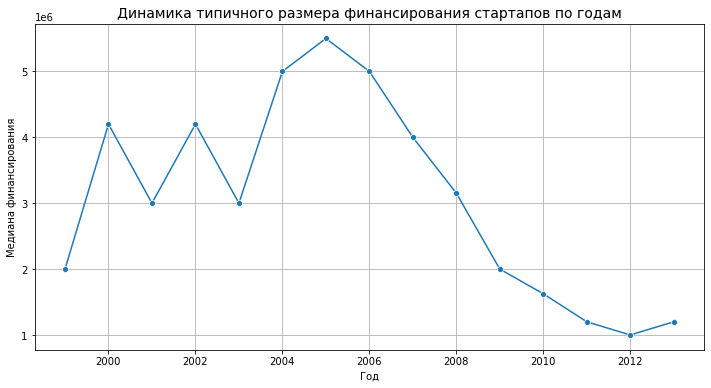

In [22]:
# Задаем размеры и строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, x='year', y='funding_median', marker='o')

# Добавляем подписи
plt.title('Динамика типичного размера финансирования стартапов по годам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Медиана финансирования')
plt.grid(True)

# Отображаем график
plt.show()

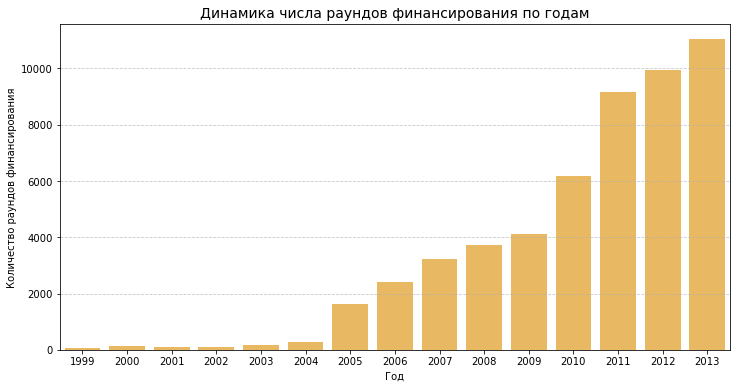

In [23]:
# Задаем размеры и строим график
plt.figure(figsize=(12, 6))
# Столбчатая диаграмма количества раундов
sns.barplot(data=pivot_table, x='year', y='total_rounds',color='orange', alpha=0.7)
plt.title('Динамика числа раундов финансирования по годам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Количество раундов финансирования')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Отображаем график
plt.show()

Анализируя график и сводную таблицу можно сделать следующие выводы:
* максимальный типичный размер (медиана) собранных в рамках одного раунда средств наблюдался в 2005 году
* в 2013 году мы видим рост выделяемых в рамках каждого раунда средств впервые с 2005 года
* в 2013 году наблюдается максимум раундов финансирования за все наблюдаемые годы, тенденция роста количества раундов идет с 2001 года


###  Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [24]:
# Посмотрим на данные датасета df_people
df_people.sort_values(by='id').head()

,id,first_name,last_name,company_id,network_username
87153,2,Ben,Elowitz,4993,elowitz
159418,3,Kevin,Flaherty,1,NaN
169453,4,Raju,Vegesna,3,NaN
179580,5,Ian,Wenig,3,NaN
189582,6,Kevin,Rose,16441,kevinrose


In [25]:
# Посмотрим на данные датасета df_education
df_education.sort_values(by='person_id').head()

,id,person_id,instituition,graduated_at
699,699,2,"University of California, Berkeley",1994-01-01
700,700,2,"University of California, Berkeley",1994-01-01
707,707,3,Indiana University,NaT
706,706,3,Washington University in St Louis,NaT
47873,47871,5,McGill University,1986-01-01


Как видно из данных у некоторых сотрудников несколько строк записей об образовании, данные об окончании заполнены не всегда. Будем считать, что если у сотрудника есть хотя бы одно заполненное поле `instituition`, то информация об образовании у него есть.

In [26]:
# Объединяем датафреймы
df_people_edu = pd.merge(df_people, df_education, left_on='id', right_on='person_id', how='left')

# Переименуем одинаковые столбцы
df_people_edu = df_people_edu.rename(columns={'id_x': 'id', 'id_y': 'id_edu'})
display(df_people_edu.sort_values(by='id').head())

# Посчитаем количество сотрудников с имеющейся информацией об образовании
count_with_education = df_people_edu.groupby('id')['instituition'].any().sum()

print('Количество сотрудников с образованием:', count_with_education)

,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at
100011,2,Ben,Elowitz,4993,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01
100012,2,Ben,Elowitz,4993,elowitz,700.0,2.0,"University of California, Berkeley",1994-01-01
191139,3,Kevin,Flaherty,1,NaN,706.0,3.0,Washington University in St Louis,NaT
191140,3,Kevin,Flaherty,1,NaN,707.0,3.0,Indiana University,NaT
202670,4,Raju,Vegesna,3,NaN,NaN,NaN,NaN,NaT


Количество сотрудников с образованием: 68038


Имеется также таблица df_degrees. Выскажем гипотезу, что при присоединении ее к новой таблице df_people_edu получится расширить информацию об образовании: возможно у каких-то сотрудников не заполнено поле `instituition`, но при этом заполнены поля `degree_type` или `subject`, что также можно отметить как наличие образование.

Проверим гипотезу. Выше мы рассматривали данные в df_degrees. В нем есть столбец `object_id`, в котором идентификаторы сотрудника представлены  с префиксом "p:". Добавим новый столбец без префикса.

In [27]:
# Удаляем префикс 'p:' и преобразуем в int
df_degrees['object_id_int'] = df_degrees['object_id'].str.replace('p:', '', regex=False).astype(int)
df_degrees.sort_values(by='object_id_int').head()

,id,object_id,degree_type,subject,object_id_int
698,699,p:2,BS,Electrical Engineering/Computer Science,2
699,700,p:2,BS,Applied Mathematics,2
705,706,p:3,BBA,NaN,3
706,707,p:3,MBA,NaN,3
47870,47871,p:5,BS,"Biology, Psychology",5


В результате изучения данных можно сделать вывод: столбец `person_id` в df_education соответствует столбцу `object_id_int` в df_degrees, по ним можно провести объединение.

In [28]:
# Объединяем датафреймы
df_people_edu_deg = pd.merge(df_people_edu, df_degrees, left_on='person_id', right_on='object_id_int', how='left')

# Переименуем одинаковые столбцы
df_people_edu_deg = df_people_edu_deg.rename(columns={'id_x': 'id', 'id_y': 'id_deg'})
display(df_people_edu_deg.sort_values(by='id').head())


,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,id_deg,object_id,degree_type,subject,object_id_int
132804,2,Ben,Elowitz,4993,elowitz,700.0,2.0,"University of California, Berkeley",1994-01-01,700.0,p:2,BS,Applied Mathematics,2.0
132801,2,Ben,Elowitz,4993,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01,699.0,p:2,BS,Electrical Engineering/Computer Science,2.0
132802,2,Ben,Elowitz,4993,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01,700.0,p:2,BS,Applied Mathematics,2.0
132803,2,Ben,Elowitz,4993,elowitz,700.0,2.0,"University of California, Berkeley",1994-01-01,699.0,p:2,BS,Electrical Engineering/Computer Science,2.0
271007,3,Kevin,Flaherty,1,NaN,707.0,3.0,Indiana University,NaT,706.0,p:3,BBA,NaN,3.0


Теперь подсчитаем количество людей с образованием в новой таблице: заполнено хотя бы одно из полей `instituition`, `degree_type`, `subject`

In [29]:
count_with_education2 = df_people_edu_deg.groupby('id')[['instituition', 'degree_type', 'subject']].any().any(axis=1).sum()

print('Количество сотрудников с образованием:', count_with_education2)

Количество сотрудников с образованием: 68068


Гипотеза подтвердилась: 68038 человек против 68068 человек, но расширение данных незначительное - добавили 30 человек с образованием. Оставим объединенную таблицу для дальнейшего анализа.

In [30]:
# Создадим столбец, который указывает на наличие образования (заполнено хотя бы одно из полей instituition, degree_type, subject)
df_people_edu_deg['has_edu'] = df_people_edu_deg[['instituition', 'degree_type', 'subject']].notna().any(axis=1)
df_people_edu_deg['has_not_edu'] = ~df_people_edu_deg['has_edu']
display(df_people_edu_deg.sort_values(by='company_id').head())


,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,id_deg,object_id,degree_type,subject,object_id_int,has_edu,has_not_edu
5793,104800,Alex,Weinstein,1,alexweinstein,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False,True
271005,3,Kevin,Flaherty,1,NaN,706.0,3.0,Washington University in St Louis,NaT,706.0,p:3,BBA,NaN,3.0,True,False
271006,3,Kevin,Flaherty,1,NaN,706.0,3.0,Washington University in St Louis,NaT,707.0,p:3,MBA,NaN,3.0,True,False
271007,3,Kevin,Flaherty,1,NaN,707.0,3.0,Indiana University,NaT,706.0,p:3,BBA,NaN,3.0,True,False
271008,3,Kevin,Flaherty,1,NaN,707.0,3.0,Indiana University,NaT,707.0,p:3,MBA,NaN,3.0,True,False


Теперь можно перейти к анализу данных. Сгруппируем данные по компаниям и посчитаем для каждой компании количество уникальных сотрудников и количество сотрудников без информации об образовании:

In [31]:
# Группируем по company_id
df_grouped_by_comp = df_people_edu_deg.groupby('company_id').agg(
    total_staff=('id', 'nunique')
).reset_index()

# Считаем количсетво сотрудников без образования
df_without_edu = df_people_edu_deg[df_people_edu_deg['has_not_edu'] == True]

# Группируем по company_id и считаем уникальных сотрудников без образования
staff_without_edu = df_without_edu.groupby('company_id')['id'].nunique().reset_index()

# Объединяем два датафрейма
df_grouped_by_comp = pd.merge(df_grouped_by_comp, staff_without_edu, on='company_id', how='left')

# Заполняем пропущенные значения (если нет сотрудников без образования)
df_grouped_by_comp['id'] = df_grouped_by_comp['id'].fillna(0).astype(int)

# Переименовываем столбец
df_grouped_by_comp.rename(columns={'id': 'staff_without_edu'}, inplace=True)

# Выводим результат
display(df_grouped_by_comp.head())

,company_id,total_staff,staff_without_edu
0,1,2,1
1,2,1,0
2,3,3,1
3,4,13,1
4,5,61,16


Надо определиться по какому принципу выбрать границы групп компаний. Посмотрим статистики  по столбцу `total_staff`

In [32]:
display(df_grouped_by_comp['total_staff'].describe())

count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: total_staff, dtype: float64

Как видно основная масса данных сгруппирована у значения 1, максимальное значение 244 - выброс. Построим диаграмму размаха:

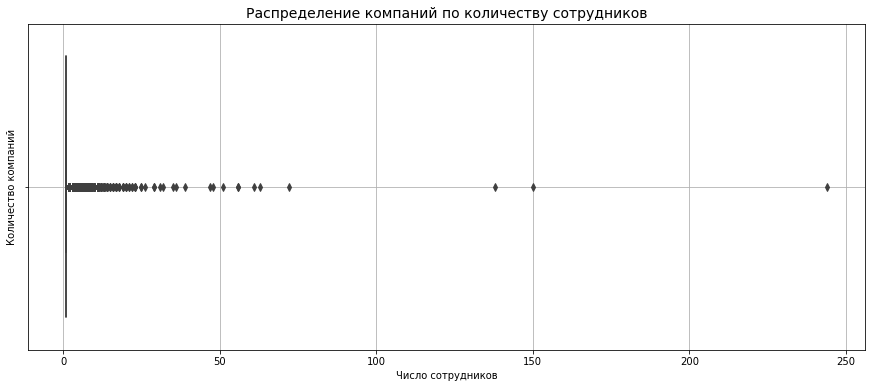

In [33]:
# Создаем диаграмму размаха для total_staff и staff_without_edu
plt.figure(figsize=(15, 6))

# Построим box plot для обеих переменных
sns.boxplot(x='total_staff',data=df_grouped_by_comp)

# Настройки графика
plt.title('Распределение компаний по количеству сотрудников', fontsize=14)
plt.xlabel('Число сотрудников')
plt.ylabel('Количество компаний')
#plt.xlim(0, 50)
plt.grid(True)

# Показываем график
plt.show()

Посмотрим диаграмму разброса, ограничив ось X

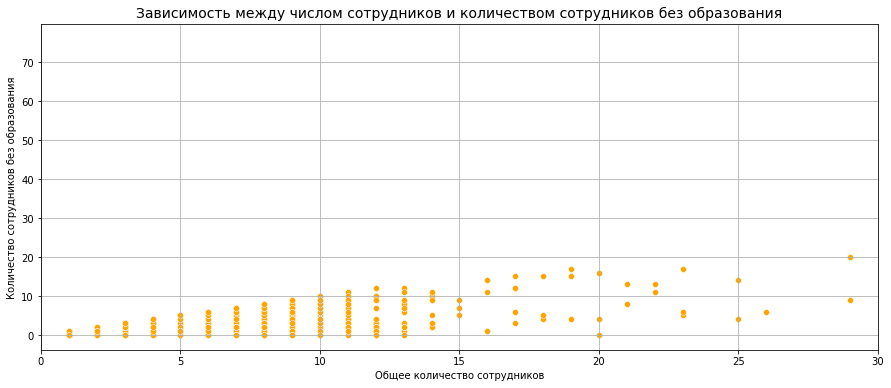

In [34]:
# Создаем диаграмму разброса для total_staff и staff_without_edu
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_staff', y='staff_without_edu', data=df_grouped_by_comp, color='orange')

# Настройки графика
plt.title('Зависимость между числом сотрудников и количеством сотрудников без образования', fontsize=14)
plt.xlabel('Общее количество сотрудников')
plt.ylabel('Количество сотрудников без образования')
plt.xlim(0, 30)
plt.grid(True)

# Показываем график
plt.show()

Стандартные критерии деления предприятий на группы:
* Микропредприятие до 15 человек
* Малое предприятие 16⁠—⁠100 человек
* Среднее предприятие 101⁠—⁠250 человек

Однако в нашем случае в категорию "микропредприятие" попадет абсолютное большинство данных.
Можно использовать следующее деление:
* Микропредприятие_1 1 человек
* Микропредприятие_2 2⁠—⁠5 человек
* Микропредприятие_3 6⁠—⁠15 человек
* Малое предприятие 16⁠—⁠100 человек
* Среднее предприятие 101⁠—⁠250 человек

Так мы сможем подробнее изучить микропредприятия, где и сконцентрированы данные.

In [35]:
# Делим на группы с фиксированными диапазонами
bins = [0, 1, 5, 15, 100, 250]  # Например, диапазоны по количеству сотрудников
df_grouped_by_comp['staff_group'] = pd.cut(df_grouped_by_comp['total_staff'], bins=bins, labels=False)

In [36]:
# Сгруппируем по 'staff_group' и посчитаем среднюю долю сотрудников без образования
without_edu_prop = df_grouped_by_comp.groupby('staff_group')['staff_without_edu'].mean().round(2)

# Печатаем результат
print(without_edu_prop)

staff_group
0     0.46
1     1.24
2     4.13
3    10.02
4    51.00
Name: staff_without_edu, dtype: float64


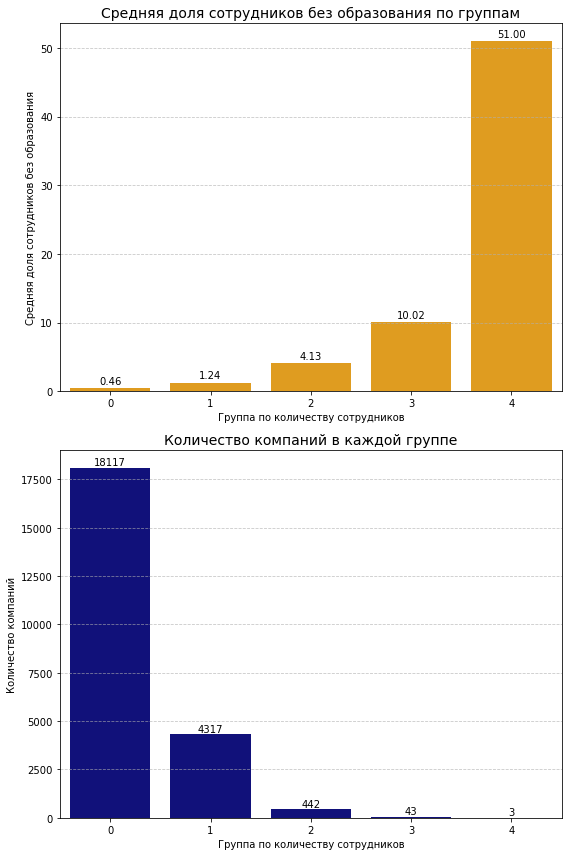

In [37]:
# Создаем две области для графиков
fig, axes = plt.subplots(2,1, figsize=(8, 12))

# График средней доли сотрудников без образования
sns.barplot(ax=axes[0], x=without_edu_prop.index, y=without_edu_prop.values, color='orange')
axes[0].set_xlabel('Группа по количеству сотрудников')
axes[0].set_ylabel('Средняя доля сотрудников без образования')
axes[0].set_title('Средняя доля сотрудников без образования по группам', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(without_edu_prop.values):
    axes[0].text(index, value + 0.3, f"{value:.2f}", ha='center', va='bottom')

# График количества компаний в каждой группе
group_counts = df_grouped_by_comp['staff_group'].value_counts().sort_index()
sns.barplot(ax=axes[1], x=group_counts.index, y=group_counts.values, color='darkblue')
axes[1].set_xlabel('Группа по количеству сотрудников')
axes[1].set_ylabel('Количество компаний')
axes[1].set_title('Количество компаний в каждой группе', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(group_counts.values):
    axes[1].text(index, value + 20, str(value), ha='center', va='bottom')

# Показываем график
plt.tight_layout()
plt.show()

Таким образом можно сделать вывод: чем больше сотрудников в компании, тем выше процент людей с отсутствующими данными об образовании.

###  Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в трех датасетах:
* в `df_company_and_rounds` - ник компании в сети
* в `df_people` - ник сотрудника в социальных сетях
* в `df_fund` - ник фонда в сети

Судя по описанию данных во всех трех случаях столбец хранит абсолютно разную информацию. Проверим.

In [38]:
# Найдем количество уникальных ников в каждом столбце
print('Количество уникальных ников:')
print('company_and_rounds:',df_company_and_rounds['network_username'].nunique())
print('people:', df_people['network_username'].nunique())
print('fund:', df_fund['network_username'].nunique())

Количество уникальных ников:
company_and_rounds: 79571
people: 38421
fund: 2098


In [39]:
# Создадим множества уникальных значений в столбце `network_username` для каждого датасета
usernames_comp = set(df_company_and_rounds['network_username'].dropna().unique())
usernames_people = set(df_people['network_username'].dropna().unique())
usernames_fund = set(df_fund['network_username'].dropna().unique())

# Проверим пересечение значений множеств
comp_and_people = usernames_comp & usernames_people
comp_and_fund = usernames_comp & usernames_fund
people_and_fund = usernames_people & usernames_fund
people_and_fund_and_comp = usernames_people & usernames_fund & usernames_comp

print('Количество пересечений:')
print('df_company_and_rounds и df_people:',len(comp_and_people))
print('df_company_and_rounds и df_fund:',len(comp_and_fund))
print('df_people и df_fund:',len(people_and_fund))
print('всех трех:',len(people_and_fund_and_comp))

Количество пересечений:
df_company_and_rounds и df_people: 2199
df_company_and_rounds и df_fund: 70
df_people и df_fund: 79
всех трех: 7


Судя по полученным данным информация в столбце `network_username` датафрейма `df_fund` мало пересекается с двумя другими столбцами. В то время как между столбцами датафреймов `df_company_and_rounds` и `df_people` пересечение в данных имеется.

Далее рассматриваем только датафреймы `df_company_and_rounds` и `df_people`. По описанию данных у них имеется еще один столбец, подходящий для объединения - `company_id`. Проверим сколько уникальных компаний соответствует нику в каждом из датафреймов.

In [40]:
# Рассчитываем колько раз для одного network_username найдено одно, два или больше уникальных company_id
print('df_company_and_rounds:')
print(df_company_and_rounds.groupby('network_username')['company_id'].nunique().value_counts())
print()
print('df_people:')
print(df_people.groupby('network_username')['company_id'].nunique().value_counts())

df_company_and_rounds:
1     78666
2       854
3        32
4        10
5         3
8         2
20        1
17        1
7         1
6         1
Name: company_id, dtype: int64

df_people:
0    21178
1    17208
2       34
4        1
Name: company_id, dtype: int64


Из полученных данных можно сделать следующие выводы.
По датафрейму `df_company_and_rounds:`
* 78666 (из 79571) network_username связаны с одной компанией
* 854 человека работали в двух компаниях
* количество network_username, связанных с бОльшим числом компаний невелико, что позволяет объединить датафреймы по столбцу  `network_username`

По датафрейму `df_people:`
* 17208 (из 38421) network_username связаны с одной компанией
* при этом 21178 network_username не связаны вообще ни с одной компанией, возможно эти люди еще не работали либо данные неполные

Итого, в обоих датафреймах большинство пользователей имеют связь только с одной компанией, что позволяет рассматривать объедение датафреймов по столбцу `network_username`. Однако стоит дополнительно обработать случаи, когда пользователь свзан с несколькими компаниями сразу.


###  Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Посмотрим на наш проблемный датасет `df_company_and_rounds`.

In [41]:
# Выводим первые строки датафрейма на экран
df_company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_double,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,888,1,2005-10-01,series-a,5250000,0,2,0,1,2005.0
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,889,1,2007-01-01,series-b,9500000,0,3,0,0,2007.0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,2312,1,2008-05-19,series-c+,25000000,0,4,1,0,2008.0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


#### Разделение датасета на два

Согласно описанию данных датафрейм содержит информацию двух типов: о компаниях и раундах финансирования. Разделим датафрейм на два по этому критерию.

In [42]:
# Формируем датафрейм df_company 
df_company = df_company_and_rounds[['company_id', 'name', 'category_code', 'status',
                                    'founded_at', 'closed_at', 'domain', 'network_username', 'country_code',
                                    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']] 
df_company.sort_values(by='company_id').head()


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
63280,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0,0,0,0
153920,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0,0,0,5


In [43]:
# Формируем датафрейм df_rounds 
df_rounds = df_company_and_rounds[['company_id_double','funding_round_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']] 
df_rounds.sort_values(by='funded_at').head()

,company_id_double,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
22620,15768,4267,1960-01-01,venture,1800000,0,0,0,1
78208,21600,5664,1960-01-01,venture,50000000,0,0,0,1
216438,9405,3128,1960-01-01,venture,0,0,0,0,1
4264,12422,3671,1960-01-01,venture,0,0,0,1,1
39936,17612,4801,1960-01-01,venture,0,0,0,1,1


Успешно сформированы два новых датафрейма на основе датафрейма `df_company_and_rounds`, которые теперь раздельно хранят информацию о компаниях и раундах финансирования.

#### Удаление дубликатов

##### Дубликаты в датасете `df_company`

Поищем дубликаты в датасете `df_company`

In [44]:
# ищем полные дубликаты
duplicates = df_company[df_company.duplicated(keep=False)]
display(duplicates)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
21,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
22,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217465,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6
217466,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6
217469,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,3,57500000,3
217470,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,3,57500000,3


In [45]:
# Удаляем дубликаты и считаем количество удаленных строк
count_str = df_company.shape[0] 
print("Всего строк в датафрейме до удаления дубликатов: ", count_str)
df_company = df_company.drop_duplicates()
print("Всего строк в датафрейме после: ", df_company.shape[0])
print("Удалено строк: ", count_str - df_company.shape[0])

Всего строк в датафрейме до удаления дубликатов:  217472
Всего строк в датафрейме после:  196553
Удалено строк:  20919


Проверим наличие менее очевидных дубликатов, в парах 'name' и 'company_id'

In [46]:
# Проверим наличие дубликатов в парах 'name' и 'company_id'
duplicates = df_company[df_company.duplicated(subset=['name', 'company_id'], keep=False)]
print("Всего строк в датафрейме: ", df_company.shape[0])
print("Найдено дубликатов: ", df_company.duplicated(subset=['name', 'company_id']).sum())

Всего строк в датафрейме:  196553
Найдено дубликатов:  0


Дубликатов больше не найдено.

##### Дубликаты в датасете `df_rounds`

In [47]:
# ищем полные дубликаты
duplicates_rounds = df_rounds[df_rounds.duplicated(keep=False)]
display(duplicates_rounds)

,company_id_double,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
3,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
5,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
6,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
7,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
217457,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
217460,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
217461,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
217462,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


In [48]:
# Удаляем дубликаты и считаем количество удаленных строк
count_strings = df_rounds.shape[0] 
print("Всего строк в датафрейме до удаления дубликатов: ", count_strings)
df_rounds = df_rounds.drop_duplicates()
print("Всего строк в датафрейме после: ", df_rounds.shape[0])
print("Удалено строк: ", count_strings - df_rounds.shape[0])

Всего строк в датафрейме до удаления дубликатов:  217472
Всего строк в датафрейме после:  52627
Удалено строк:  164845


Удалено очень большое количество дублирующих строк.

#### Пропуски

##### Пропуски в датасете `df_company`

In [49]:
# Подсчитываем процент строк с пропусками
missing_values_prop = (df_company.isna().sum() / df_company.shape[0] * 100).to_frame('missing_values').sort_values(by='missing_values', ascending = False)
# добавляем цвет
df_company_miss_prop=missing_values_prop.style.background_gradient(cmap='coolwarm',axis=0).format("{:.2f}")
display(df_company_miss_prop)

,missing_values
closed_at,98.67
network_username,59.00
country_code,55.23
founded_at,53.59
category_code,37.33
domain,35.62
company_id,0.00
name,0.00
status,0.00
investment_rounds,0.00


Анализ пропусков в датафрейме `df_company` позволяет сделать следующие выводы: 
* огромное количество пропусков в столбце `closed_at`- более 98%. Вероятная причина - компании все еще работают
* высокое количество пропусков в столбцах `network_username`, `country_code`, `founded_at
* среднее количество пропусков в столбцах `category_code`, `domain` 
* остальные столбцы заполнены полностью, пропусков нет
Данные представлены за большой период времени, возможно поэтому плохо заполнены столбцы `network_username` и `domain`.

##### Пропуски в датасете `df_rounds`

In [50]:
# Подсчитываем процент строк с пропусками
rounds_missing_values_prop = (df_rounds.isna().sum() / df_rounds.shape[0] * 100).to_frame('missing_values').sort_values(by='missing_values', ascending = False)
# добавляем цвет
df_rounds_miss_prop=rounds_missing_values_prop.style.background_gradient(cmap='coolwarm',axis=0).format("{:.2f}")
display(df_rounds_miss_prop)

,missing_values
funded_at,0.47
company_id_double,0.00
funding_round_id,0.00
funding_round_type,0.00
raised_amount,0.00
pre_money_valuation,0.00
participants,0.00
is_first_round,0.00
is_last_round,0.00


Анализ пропусков в датафрейме показал, что пропуски содержатся только в столбце `funded_at` в количестве 0,47%. Доля пропусков небольшая, их наличие связано, вероятно, с ошибками в заполнении данных. Поскольку остальные столбцы заполнены, едва ли финансирование еще не было выделено. Для дальнейшего анализа такую небольшую долю пропусков допустимо удалить.

#### Итог

Взглянем на получившийся датафрейм `df_company`

In [51]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  Int64         
 12  milestones         196553 non-null  Int64         
dtypes: Int64(5), datetime64[ns](2), object(6)
me

In [52]:
df_company.sort_values(by='company_id').head(15)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
63280,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0,0,0,0
153920,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0,0,0,5
165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000,8
217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700000,5
199822,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000,4
209255,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0,0
215846,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,3,16500000,4
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
217457,11,Fox Interactive Media,web,operating,1979-06-01,NaT,newscorp.com,networkapi,USA,2,0,0,0


Итоговый датафрейм готов к дальнейшему анализу:
* оставлены только нужные столбцы
* порядок столбцов оптимален
* дубликаты строк удалены
* проведен анализ пропусков
* типы данных столбцов оптимизированы ранее
* наименования столбцов приведены к стилю snake case ранее

### Промежуточный вывод

В результате второго этапа предобработки данных были выполнены следующие шаги:
* изучены раунды финансирования по годам, составлена сводная таблица, построены графики
* подробно изучены данные о наличии образования у сотрудников, произведено разделение на группы и расчет показателей для каждой группы
* изучены столбцы `network_username` в трех датафреймах, произведен анализ возможности объединения по нему датафреймов
* создан и подготовлен к дальнейшему анализу датафрейм `df_company`



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. 
Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. 
Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. 
В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [53]:
# Отфильтруем датасет по указанным условиям
df = df_company[((df_company['funding_rounds'] > 0) | 
                 (df_company['investment_rounds'] > 0)) | 
                 (df_company['status'] =='acquired')]
display(df)
df.info()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0,1,10000000,0
217459,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0,1,500000,1
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,1300000,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  Int64         
 12  milestones         40747 non-null  Int64         
dtypes: Int64(5), datetime64[ns](2), object(6)
memory usage: 4.5+


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Рассчитаем статистики для столбца `funding_total`:

In [54]:
df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

* Минимальное значение = 0 и максимальное = 5.7 млрд
* Медиана (600 тыс долларов) значительно отстает от среднего арифметического (10,14 млн долларов), значит данные сильно смещены вправо. 
* Стандартное отклонение велико(56,46 млн долларов), указывает на крупные выбросы. 25% = 0, т.е. 25% компаний не получали финансирования. 

Однако, заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям. Исходя из этого отфильтруем только те компании, которые получали средства. 

In [55]:
# выберем только компании, которые получали финансирование
df_fund = df[(df['funding_total'] > 0)]
display(df_fund)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
21,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200,0
26,100155,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0,3,10125300,1
32,10018,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0,3,33000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0,1,10000000,0
217459,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0,1,500000,1
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,1300000,3


Как видим, в результате фильтрации количество строк в датафрейме сократилось с 40747 до 27874.

In [56]:
# Рассчитаем статистики для отфильтрованного датафрейма
df_fund['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Статистики после фильтрации значительно изменились.
* Минимальное значение = 291 и максимальное = 5.7 млрд, разница указывает на сильный разброс данных
* Среднее арифметическое  14.8 млн, медиана 2.56 млн
* Среднее значение сильно завышено выбросами, поэтому медиана лучше отражает типичный размер финансирования.
* Стандартное отклонение 67.7 млн - очень велико, подтверждает огромный  разброс
* Данные по прежнему сильно скошены вправо за счет редких, но огромных сумм финансирования единичных компаний.

Построим диаграмму размаха для визуального представления данных.

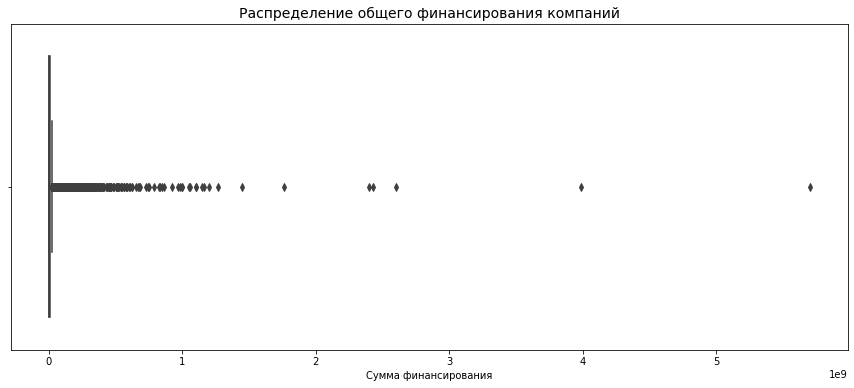

In [57]:
# Задаем размер фигуры
plt.figure(figsize=(15, 6))

# Строим и отображаем диаграмму размаха
sns.boxplot(x='funding_total', data=df_fund)
plt.title('Распределение общего финансирования компаний', fontsize=14)
plt.xlabel('Сумма финансирования')
plt.show()

Скроем выбросы на графике.

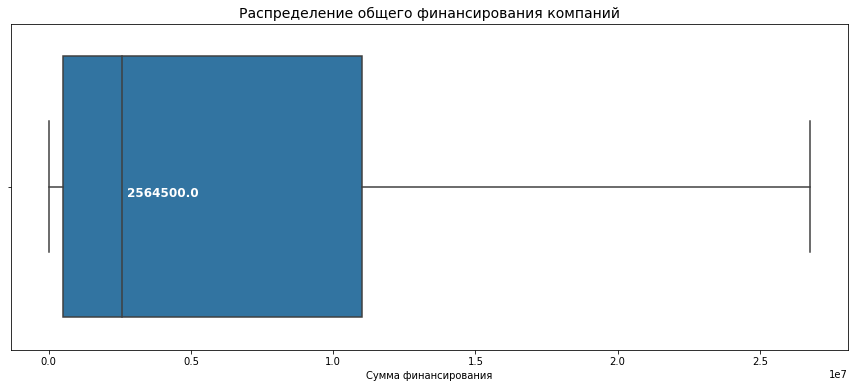

In [58]:
# Задаем размер фигуры
plt.figure(figsize=(15, 6))

# Строим boxplot
sns.boxplot(x=df_fund['funding_total'], showfliers=False)

# Заголовок и ось
plt.title('Распределение общего финансирования компаний', fontsize=14)
plt.xlabel('Сумма финансирования')

# Вычисляем медиану
median = df_fund['funding_total'].median()

# Добавляем подпись медианы
plt.text(4.0e+06, 0, median, ha='center', va='top', fontsize=12, color='white', fontweight='bold')

# Отображаем график
plt.show()

Ответим на основной вопрос заказчика - какой обычный размер средств, предоставляемый компаниям:
- типичный уровень финансирования - медиана, 2.56 млн. На графике это центральная линия.
- основная масса данных внутри ящика - от 500 тыс (25-й перцентиль) до 11 млн (75-й перцентиль)
- выбросы - точки дальше усов указывают на нетичные выбросы.


### Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. 
* Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

Присоединим к нашему датафрейму с информацией о компаниях датафрейм `df_acquisition`, чтобы получить информацию о суммах сделок по продаже компаний.

In [59]:
# Объединим два датафрейма
df_acq = df.merge(df_acquisition, left_on='company_id', right_on='acquired_company_id', how='left')
display(df_acq)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,NaN,NaN,NaN,NaN,NaN,NaT
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0,1,10000000,0,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0,1,500000,1,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,44000000,6,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,1300000,3,NaN,NaN,NaN,NaN,NaN,NaT


Отфильтруем датасет по указанным условиям:
* были проданы за ноль или за один доллар
* при этом имели ненулевой общий объём финансирования

In [60]:
# Отфильтруем датасет по указанным условиям

df_acq_free = df_acq[((df_acq['price_amount'] == 0) | 
                 (df_acq['price_amount'] == 1)) & 
                 (df_acq['funding_total'] > 0)]
display(df_acq_free)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,121500000,3,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
63,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,4000000,2,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
66,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,250000,1,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
67,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,1310000,2,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
68,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,44925000,1,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0,2,3900000,0,7024.0,317.0,99.0,NaN,0.0,2010-09-22
40836,9905,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0,2,5172350,0,3381.0,41119.0,9905.0,NaN,0.0,2010-06-24
40840,992,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0,1,10000000,1,9916.0,19182.0,992.0,NaN,0.0,2010-07-02
40854,997,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0,1,14500000,3,9121.0,415.0,997.0,NaN,0.0,2013-07-15


Рассчитаем верхнюю и нижнюю границу выбросов для столбца `funding_total`.

Нижння граница усов рассчитывается по формуле: Q1−1.5×IQR

Верхняя граница: Q3+1.5×IQR

Q1 - 25-й перцентиль

Q3 - 75-й перцентиль

IQR = Q3 - Q1

In [61]:
# Выполним вычисления
Q1 = df_acq_free['funding_total'].quantile(0.25)
Q3 = df_acq_free['funding_total'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR = ', IQR)

# Вычисляем границы выбросов
lower_bound =  max(0, Q1 - 1.5 * IQR) # так зачения финансирования не могут быть отрицательными
upper_bound = Q3 + 1.5 * IQR

print('Нижняя граница выбросов:', lower_bound)
print('Верхняя граница выбросов:', upper_bound)
print()

# примерно определим какому перцентилю соответствует верхняя граница выбросов
perc_x = (df['funding_total'] <= upper_bound).mean() * 100
print('Примерный перцентиль ', round(perc_x,2))
perc_91 = df_acq_free['funding_total'].quantile(0.91)
print('91-й % = ', round(perc_91,2))

Q1 =  2000000
Q3 =  15500000
IQR =  13500000
Нижняя граница выбросов: 0
Верхняя граница выбросов: 35750000.0

Примерный перцентиль  93.69
91-й % =  35894000.0


Для наглядости добавим график.

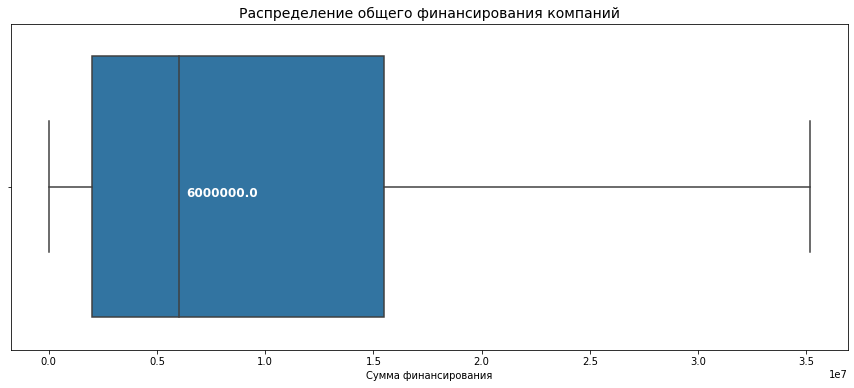

In [62]:
# Задаем размер фигуры
plt.figure(figsize=(15, 6))

# Строим boxplot
sns.boxplot(x=df_acq_free['funding_total'], showfliers=False)

# Заголовок и ось
plt.title('Распределение общего финансирования компаний', fontsize=14)
plt.xlabel('Сумма финансирования')

# Вычисляем медиану
median = df_acq_free['funding_total'].median()

# Добавляем подпись медианы
plt.text(8.0e+06, 0, median, ha='center', va='top', fontsize=12, color='white', fontweight='bold')

# Отображаем график
plt.show()

Таким образом, были рассчитаны границы выбросов. При этом нижняя граница по расчетам получилась отрицательной, ее скорректировали и перенесли на ноль т.к. отрицательных значений в столбце быть не может по характеру хранимых данных.
Верхняя граница, как было рассчитано, соответствует 91-ому перцентилю.
Заменить выбросы на значения, рассчитанные по процентилям, возможно. Но стоит разобраться нет ли ошибки в огромной стоимости покупки редких компаний, либо учесть, что некоторые компании действительно могут иметь такую цену.


### Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Сгруппируем стартапы по категориям и найдем средние цены и стандартные отклонения по каждой категории. По величине стандартного отклонения сделаем вывод о разбросе цен в категории. Чем выше стандартное отклонение, тем больше разброс. Выделим топ-10 категорий по этим критериям, отобразим на графиках.

In [63]:
# Группируем стартапы по категориям и считаем медиану и стандартное отклонение price_amount
df_acq_filt = df_acq[df_acq['price_amount'] > 0]
category_stats = df_acq_filt.groupby('category_code')['price_amount'].agg(['median','std','count'])

# Топ-10 категорий по медианной цене продажи
top_10_price = category_stats.sort_values(by='median', ascending=False).head(10)


# Топ-10 категорий по стандартному отклонению
top_10_disper = category_stats.sort_values(by='std', ascending=False).head(10)

print("Топ-10 категорий по наибольшей медианной цене:")
display(top_10_price)

print("\nТоп-10 категорий по наибольшему разбросу цен:")
display(top_10_disper)

Топ-10 категорий по наибольшей медианной цене:


,median,std,count
category_code,,,
automotive,2.400000e+09,2.581669e+09,3
sports,6.225000e+08,5.126524e+08,2
nanotech,5.840000e+08,NaN,1
real_estate,4.000000e+08,2.676302e+09,6
manufacturing,3.510000e+08,1.060435e+09,21
transportation,2.300000e+08,5.726255e+08,3
biotech,2.000000e+08,1.968195e+09,263
analytics,2.000000e+08,9.296774e+07,3
fashion,1.950000e+08,8.649422e+07,3



Топ-10 категорий по наибольшему разбросу цен:


,median,std,count
category_code,,,
enterprise,5.475000e+07,2.413581e+11,116
public_relations,1.100000e+08,6.854338e+09,74
real_estate,4.000000e+08,2.676302e+09,6
automotive,2.400000e+09,2.581669e+09,3
other,7.155000e+07,2.060861e+09,84
biotech,2.000000e+08,1.968195e+09,263
health,1.400000e+08,1.927100e+09,10
games_video,5.825000e+07,1.463478e+09,88
security,1.645000e+08,1.378442e+09,36


Построим графики для наглядности.

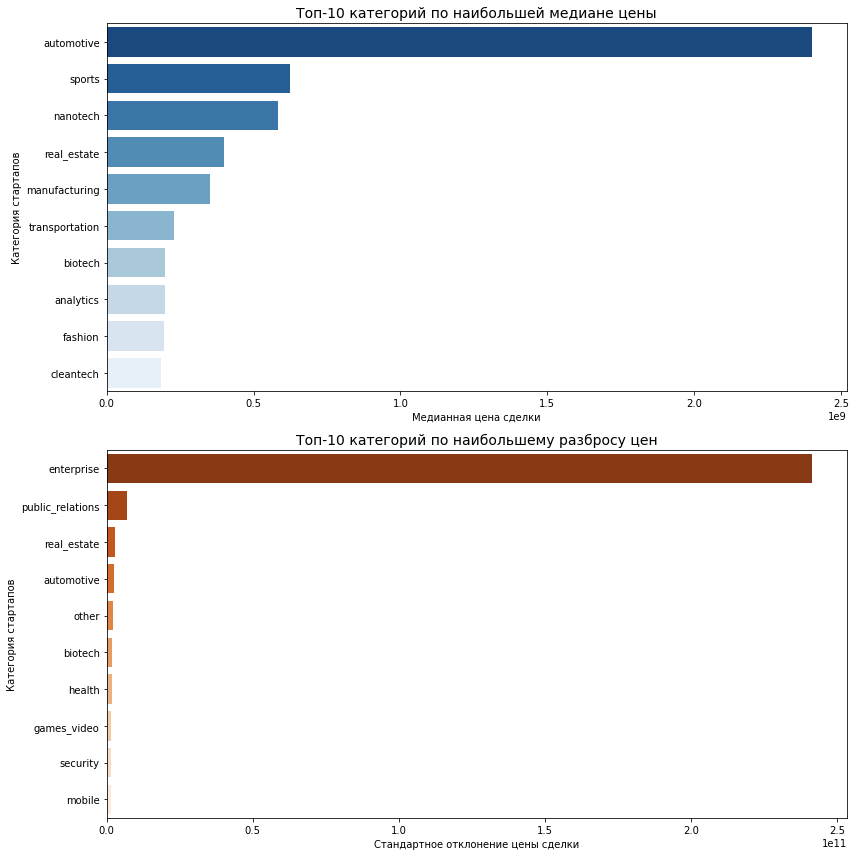

In [64]:
# Задаем размер фигуры
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# График для топ-10 категорий по наибольшей медиане цены
sns.barplot(x=top_10_price['median'], 
            y=top_10_price.index, 
            ax=axes[0], 
            palette="Blues_r")

    
axes[0].set_title("Топ-10 категорий по наибольшей медиане цены", fontsize=14)
axes[0].set_xlabel("Медианная цена сделки")
axes[0].set_ylabel("Категория стартапов")

# График для топ-10 категорий по наибольшему разбросу цен
sns.barplot(x=top_10_disper['std'], 
            y=top_10_disper.index, 
            ax=axes[1], 
            palette="Oranges_r")

axes[1].set_title("Топ-10 категорий по наибольшему разбросу цен", fontsize=14)
axes[1].set_xlabel("Стандартное отклонение цены сделки")
axes[1].set_ylabel("Категория стартапов")


plt.tight_layout()
plt.show()

* Лидером по цене продажи является категория `automotive` (автомобильная отрасль) с медианной ценой 2,4 млрд. 
* Высокие медианные цены также у стартапов в сферах спорта, нанотехнологий, недвижимости и производства. Однако в некоторых категориях (например, `nanotech`) мало сделок, поэтому статистика может быть менее надежной.
* Самый большой разброс цен наблюдается в категории `enterprise` — стандартное отклонение 241 млрд, то есть есть сделки очень дешевые и крайне дорогие. 
* Отметим также, что категория `automotive` находится на высоком 4 месте по разросу цен при количестве сделок = 3, т.е. среду такого малого количества сделок разброс крайне велик.
* `Automotive` и `real_estate` - эти категории оказались в обоих топах, значит сделки в этих категориях хоть и сильно варьируются, но все равно остаются высокими по цене.


### Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [65]:
#Рассчитаем типичные значения как медианы и как среднее
medians = df_acq.groupby('status')['funding_rounds'].median()
means = df_acq.groupby('status')['funding_rounds'].mean()
display('медианы:',medians)
display('среднее',means)

'медианы:'

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: Float64

'среднее'

status
acquired     0.525532
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: Float64

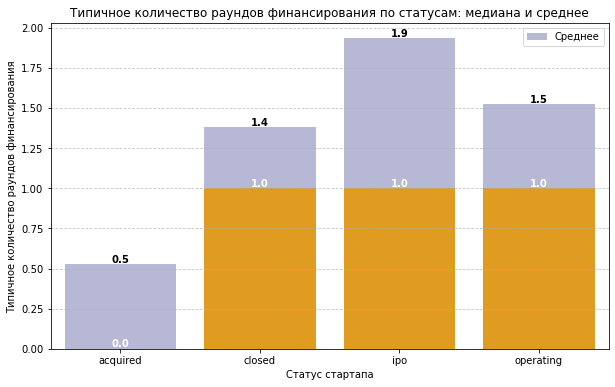

In [66]:
plt.figure(figsize=(10, 6))

# Добавляем столбцы средних значений
sns.barplot(x=means.index, y=means.values, color='darkblue', alpha=0.3, label='Среднее')
sns.barplot(x=medians.index, y=medians.values, color = 'orange')

# Добавим подписи значений среднего
for index, value in enumerate(means.values):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Добавим подписи значений медиан
for index, value in enumerate(medians.values):
    plt.text(index, value, str(value), ha='center', va='bottom',fontsize=10, color='white', fontweight='bold')
    
plt.xlabel('Статус стартапа')
plt.ylabel('Типичное количество раундов финансирования')
plt.title('Типичное количество раундов финансирования по статусам: медиана и среднее')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Выводы:
* Во всех категориях среднее значение выше медианного, значит оно завышается выбросами т.е. были стартапы, которые проходили очень много раундов финансирования
* Для анализа стоит ориентироваться на медианные значения
* Стартапы в статусе `acquired` медианное значение числа раундов = 0, значит зачастую эти стартапы не получили ни одного раунда финансирования
* Остальные три статуса имеют одинаковое значение медиан - 1, значит независимо от статуса в среднем стартапы проходят по 1 раунду финансирования.


## Шаг 4. Итоговый вывод и рекомендации


Итоговый проект был посвещен изучению стартапов. В ходе выполнения проекта были достигнуты цели, поставленные в начале работы. 

Были выполнены следующие действия по предобработке данных:

* загружены 7 датасетов, изучено описание данных, хранимых в них
* все датафреймы прошли этап предобработки: оптимизация типов, удаление пропусков, переименование столбцов по необходимости.
* в ходе дальнейшей работы датафрейм `df_company_and_rounds` был разделен по смыслу хранимой информации для оптимизации доступа, еще раз прошел проверку на пропуски и дубликаты, в результате чего анализ на его основе стал значительно качественнее.

Были подробно изучены такие аспекты:
- Динамика числа раундов финансирования по годам, построены сводные таблицы и графики. 
- Образование сотрудников: определены критерии каких данных достаточно и необходимо, чтобы человек считался имеющим образование. Составлены диаграммы для визуализации обратной зависимости числа сотрудников в компании и заполненности информации о сотрудниках.
- Исследовали возможность объединения данных по различным идентификаторам
- Проанализировали распределение общего объема финансирования, выявили типичные значения, определили выбросы. Построили график типа "ящик с усами" для наглядного представления характера распределения.
- Рассчитали границы выбросов с помощью метода IQR.
- Изучили категории стартапов, определили топ-10 категорий с наибольшими типичными ценами. Выявили топ-10 категорий с наибольшим разбросом цен. Выделили 4 категории, которые на обоих графиках входят в топ-4. Поэтому именно эти категории могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. 
- Проанализировали количество раундов финансирования для разных статусов стартапов. Построили визуализацию, сравнив медианные и средние значения. Обнаружили, что среднее количество раундов финансирования всегда выше медианного из-за редких, но очень крупных случаев.

Сложность аналитических исследований на этом датасете обусловлена огромными выбросами в данных о финансировании, в частности по столбцу `funding_total`. Сравнительный анализ статистик подтвержает асимметричность распределения, правильность выводов по выбросам. Кроме того, датасет охватывает данные о компаниях с 1960 года, что видимо может объяснить большое количество пропусков ввиду технического отсутствия в те года у компаний параметров, например, адрес в сети. Это аспект также затрудняет процесс анализа. Однако противоречий в результатах анализа выявлено не было.